# Lending Club loan prediction

### Project Overview

Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score).

Lending Club provides the "bridge" between investors and borrowers. This data contains complete loan data for all loans issued for the first quarter of 2012, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Our goal here is to predict potential loan defaulters.

Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. 

### Dataset
The file is a matrix of about 188183 observations and 77 variables.

#### Features:

- addr_state: The state provided by the borrower in the loan application
- annual_inc: The self-reported annual income provided by the borrower during registration
- annual_inc_joint: The combined self-reported annual income provided by the co-borrowers during registration
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- collection_recovery_fee: post charge off collection fee
- collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
- delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- desc: Loan description provided by the borrower
- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- dti_joint: A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- earliest_cr_line: The month the borrower's earliest reported credit line was opened
- emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- emp_title: The job title supplied by the Borrower when applying for the loan.*
- fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to.
- fico_range_low: The lower boundary range the borrower’s FICO at loan origination belongs to.
- funded_amnt: The total amount committed to that loan at that point in time.
- funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
- grade	LC assigned loan grade
- home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- id: A unique LC assigned ID for the loan listing.
- initial_list_status: The initial listing status of the loan. Possible values are – W, F
- inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- installment: The monthly payment owed by the borrower if the loan originates.
- int_rate: Interest Rate on the loan
- is_inc_v: Indicates if income was verified by LC, not verified, or if the income source was verified
- issue_d: The month which the loan was funded
- last_credit_pull_d: The most recent month LC pulled credit for this loan
- last_fico_range_high: The upper boundary range the borrower’s last FICO pulled belongs to.
- last_fico_range_low: The lower boundary range the borrower’s last FICO pulled belongs to.
- last_pymnt_amnt: Last total payment amount received
- last_pymnt_d: Last month payment was received
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- loan_status: Current status of the loan
- member_id: A unique LC assigned Id for the borrower member.
- mths_since_last_delinq: The number of months since the borrower's last delinquency.
- mths_since_last_major_derog: Months since most recent 90-day or worse rating
- mths_since_last_record: The number of months since the last public record.
- next_pymnt_d: Next scheduled payment date
- open_acc: The number of open credit lines in the borrower's credit file.
- out_prncp: Remaining outstanding principal for total amount funded
- out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors
- policy_code: publicly available policycode=1 new products not publicly available policycode=2
- pub_rec: Number of derogatory public records
- purpose: A category provided by the borrower for the loan request.
- pymnt_plan: Indicates if a payment plan has been put in place for the loan
- recoveries: post charge off gross recovery
- revol_bal: Total credit revolving balance
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- sub_grade: LC assigned loan subgrade
- term: The number of payments on the loan. Values are in months and can be either 36 or 60.
- title: The loan title provided by the borrower
- total_acc: The total number of credit lines currently in the borrower's credit file
- total_pymnt: Payments received to date for total amount funded
- total_pymnt_inv: Payments received to date for portion of total amount funded by investors
- total_rec_int: Interest received to date
- total_rec_late_fee: Late fees received to date
- total_rec_prncp: Principal received to date
- url: URL for the LC page with listing data.
- verified_status_joint: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.
- open_acc_6m: Number of open trades in last 6 months
- open_il_6m: Number of currently active installment trades
- open_il_12m: Number of installment accounts opened in past 12 months
- open_il_24m: Number of installment accounts opened in past 24 months
- mths_since_rcnt_il: Months since most recent installment accounts opened
- total_bal_il: Total current balance of all installment accounts
- il_util: Ratio of total current balance to high credit/credit limit on all install acct
- open_rv_12m: Number of revolving trades opened in past 12 months
- open_rv_24m: Number of revolving trades opened in past 24 months
- max_bal_bc: Maximum current balance owed on all revolving accounts
- all_util: Balance to credit limit on all trades
- total_rev_hi_lim: Total revolving high credit/credit limit
- inq_fi: Number of personal finance inquiries
- total_cu_tl: Number of finance trades
- inq_last_12m: Number of credit inquiries in past 12 months
- acc_now_delinq: The number of accounts on which the borrower is now delinquent.
- tot_coll_amt: Total collection amounts ever owed
- tot_cur_bal: Total current balance of all accounts

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lending-GP.csv')

C:\Users\Mrunal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,NaN,8000.0,8000.0,8000.0,36 months,10.99%,261.88,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,20800.0,NaN,NaN,NaN
1,NaN,NaN,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,43100.0,NaN,NaN,NaN
2,NaN,NaN,10000.0,10000.0,10000.0,36 months,9.67%,321.13,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,22300.0,NaN,NaN,NaN
3,NaN,NaN,11500.0,11500.0,11500.0,60 months,22.90%,323.54,E,E4,...,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN
4,NaN,NaN,15000.0,15000.0,15000.0,36 months,8.90%,476.30,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN


In [4]:
X = df.drop('loan_status',1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 4)

In [5]:
#Removing columns with more 25% missing data

col = df.isnull().sum()
print(col)

col_drop = col[col>0.25*len(df)].index.tolist()

for x in df:
    if df[x].nunique() == 1:
        col_drop.append(x)

id                  188181
member_id           188183
loan_amnt                2
funded_amnt              2
funded_amnt_inv          2
                     ...  
all_util            188183
total_rev_hi_lim     27743
inq_fi              188183
total_cu_tl         188183
inq_last_12m        188183
Length: 73, dtype: int64


In [6]:
col_drop

['id',
 'member_id',
 'url',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'pymnt_plan',
 'policy_code',
 'application_type']

In [7]:
X_train = X_train.drop(col_drop,1)
X_test = X_test.drop(col_drop,1)

In [8]:
#Target variable is multiclass

#Fully paid and current as 0, rest as 1

df.loan_status.unique()
df.loan_status.value_counts()

Fully Paid            157731
Charged Off            29630
Current                  731
Late (31-120 days)        43
In Grace Period           35
Late (16-30 days)         11
Name: loan_status, dtype: int64

In [9]:
y_train = np.where((y_train == 'Fully Paid') |(y_train == 'Current'), 0, 1)

In [10]:
y_test = np.where((y_test == 'Fully Paid') |(y_test == 'Current'), 0, 1)

In [11]:
#Missing values and encoding of categorical variables

categorical = X_train.select_dtypes(include = 'O').columns.tolist()
numerical = X_train.select_dtypes(exclude = 'O').columns.tolist()

In [12]:
categorical

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d']

In [13]:
numerical

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [14]:
#Filling missing values in both categorical(mode) and numerical columns(mean)

for x in categorical:
    mode = X_train[x].mode()[0]
    X_train[x].fillna(mode, inplace = True)

for x in numerical:
    mean = X_train[x].mean()
    X_train[x].fillna(mean,inplace = True)

# Test Data
for x in categorical:
    mode = X_train[x].mode()[0]
    X_test[x].fillna(mode,inplace = True)

for x in numerical:
    mean = X_train[x].mean()
    X_test[x].fillna(mean,inplace = True)

In [15]:
#Label encoding categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in categorical:  
    X_train[x] = le.fit_transform(X_train[x])
    X_test[x] = le.fit_transform(X_test[x])

In [16]:
# Using Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state =42,max_depth=2,min_samples_leaf=5000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("F1",f1)

precision = precision_score(y_test, y_pred)
print("Precision",precision)

recall = recall_score(y_test, y_pred)
print("Recall",recall)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROCAUC",roc_auc)

F1 0.5965012905075997
Precision 1.0
Recall 0.425010216591745
ROCAUC 0.7125051082958724


In [17]:
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, rf.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

Confusion_matrix
 [[39705     0]
 [ 4221  3120]]
Classification_report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     39705
           1       1.00      0.43      0.60      7341

    accuracy                           0.91     47046
   macro avg       0.95      0.71      0.77     47046
weighted avg       0.92      0.91      0.89     47046



Auc score: 0.9936442927124253


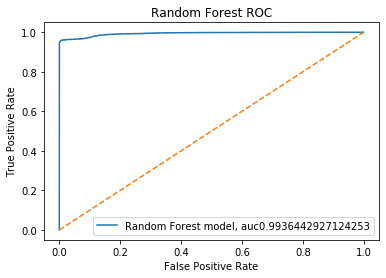

In [18]:
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('Auc score:', auc)

plt.title('Random Forest ROC')
plt.plot(fpr,tpr,label="Random Forest model, auc"+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [19]:
# Using XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.0001)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("F1",f1)

precision = precision_score(y_test, y_pred)
print("Precision",precision)

recall = recall_score(y_test, y_pred)
print("Recall",recall)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROCAUC",roc_auc)

F1 0.9826773835920176
Precision 1.0
Recall 0.9659446941833537
ROCAUC 0.9829723470916769


In [20]:
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, rf.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

Confusion_matrix
 [[39705     0]
 [ 4221  3120]]
Classification_report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39705
           1       1.00      0.97      0.98      7341

    accuracy                           0.99     47046
   macro avg       1.00      0.98      0.99     47046
weighted avg       0.99      0.99      0.99     47046



Auc score: 0.9956280363622323


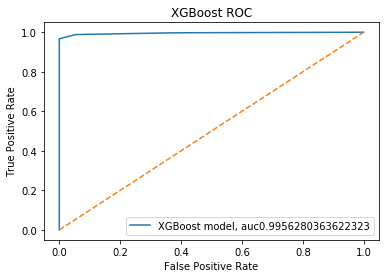

In [21]:
y_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('Auc score:', auc)

plt.title('XGBoost ROC')
plt.plot(fpr,tpr,label="XGBoost model, auc"+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()